In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [7]:
f = np.arange(1, 11)*10**3
phi = np.array([73.6,54.5,43.6, 41.5,35.9,31.6,30.5,27.3,23.9,21.8])
dphi = np.array([21.8,21.8,10.1,4.3,4.3,3.2,3.2,3.2,2.1,2.1])

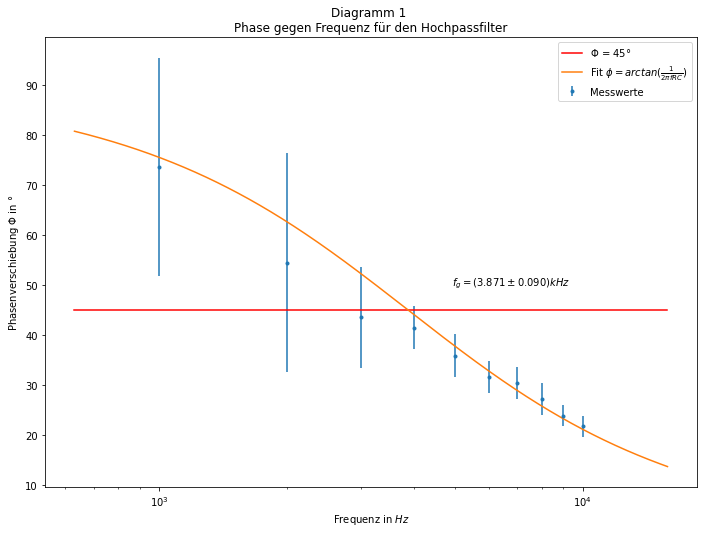

In [9]:
fit_func = lambda f, RC: np.arctan(1/(2*np.pi*f*RC))/(2*np.pi)*360

popt, pcov = curve_fit(fit_func, f, phi, sigma = dphi, p0 = 1)
perr = np.sqrt(np.diag(pcov))

f0 = 1/(np.tan(45*2*np.pi/360)*2*np.pi*popt[0])
df0 = f0*perr[0]/popt[0]

x = np.logspace(2.8, 4.2, 1000)

plt.errorbar(f, phi, dphi, ls = 'none', label = 'Messwerte' ,fmt=".")
plt.plot(x, (x/x)*45, color = 'r', label = '$\Phi$ = 45°')
plt.plot(x, fit_func(x, popt), label = r'Fit $\phi = arctan(\frac{1}{2\pi f RC})$')
plt.annotate(r'$f_g = ({:.3f}\pm{:.3f})kHz$'.format(f0*1e-3, df0*1e-3), (17**3, 50))

plt.xscale('log')
plt.xlabel(r'Frequenz in $Hz$')
plt.ylabel(r'Phasenverschiebung $\Phi$ in °')
plt.title('Diagramm 1 \nPhase gegen Frequenz für den Hochpassfilter')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("Phase gegen Frequenz", dpi=150)